## Data Science Final Project 
### Author: Gagan Daroach

In [80]:
#imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pprint as pp
%matplotlib inline 
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

pd.options.display.float_format = '{:,.3f}'.format

### Dataset

dataset link: https://www.kaggle.com/lava18/google-play-store-apps/version/5

Author Lavanya Gupta is responsible for the creation of this dataset. The dataset was last updated one month ago (as of Tue Oct 30 2018). The dataset was populated with web scraped data from the Google Play Store. There are 13 features that describe the dataset. 
       
App: App Name

Category: App Category

Rating: App Rating (0.0 thru 5.0)

Reviews: Number of reviews. 

Size: App install size

Installs: Number of Installs

Type: Either paid or free

Price: App Price

Content Raiting: Age group the app is targeted at. 

Genres: Apart from category (unique value), an app can belong to many genres

Last Updated: date when the app was last updated on the google play store

Current Version: Current version of app avaiable on play store

Android Version: minimun required version to run the app

Possible target variables: Number of Installs & App Rating - explanation under hypothesis. 


### Dataframe Information

In [81]:
apps_df = pd.read_csv("googleplaystore.csv")
apps_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.400,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.100,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.400,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.700,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [82]:
pp.pprint(apps_df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


### Major Objectives

I want to focus my app development on features that will be most impactful on my app downloads. If I can identity a formula for success, I can use it to prioritize my workflow. 

Additionally, this dataset has many values to figure out how to manage. For starters, the columns Current Version, Android Version, and Category need to be one hot encoded up to allow for some model magic. I want the practice using Data Science to influence decision making. 

### Hypothesis

I predict that there will be a way to determine number of installs based on a set of other predicter variables. I am anticipating Price and Rating to be strong determiners. I plan on using linear regression to test this hypothesis. I am curious to see the effects of the other roles, such as the impact of genres, category, and android versions.

### Data Preprocessing
identification of required features, proper handling of missing
values (removal, imputation, etc.), and supporting documentation for your decisions such
as the number of missing values relative to the size of the dataset.

#### Initial Table Transformations

In [83]:
apps_df.dropna(inplace=True)
apps_df.drop_duplicates(inplace=True)

Above, I drop duplicate elements in the table, and I drop all rows with missing data.

In [84]:
apps_df.describe()

,Rating
count,"8,886.000"
mean,4.188
std,0.522
min,1.000
25%,4.000
50%,4.300
75%,4.500
max,5.000


In [85]:
def p_uniques(column_name, df_name = apps_df):
    print('Unique Values for Column: %s' % (column_name))
    pp.pprint(df_name[column_name].unique())
    
def p_describe(column_name, df_name = apps_df):
    print('Description for Column: %s' % (column_name))
    pp.pprint(df_name[column_name].describe())
    
def p_stats(column_name, df_name = apps_df):
    p_describe(column_name, df_name)
    p_uniques(column_name, df_name)

In [86]:
def plotHBarGraph(column_name, result = None):
    if (result == None):
        result = apps_df[[column_name]].apply(pd.value_counts).fillna(0).T
        result.index=[column_name]
        result.columns=apps_df[column_name].unique()
        pd.options.display.float_format = '{:,.0f}'.format
    # horizontal bar plot
    plt=result.plot.barh(title=column_name)
    plt.set_xlabel("Count")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt

#### Column 1 - App Names

In [87]:
column_name = 'App'

In [88]:
p_stats(column_name)

Description for Column: App
count       8886
unique      8190
top       ROBLOX
freq           9
Name: App, dtype: object
Unique Values for Column: App
array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Fr. Mike Schmitz Audio Teachings',
       'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)


No abnomalies detected. 

#### Column 2 - Category

In [89]:
column_name = 'Category'

In [90]:
#plt.hist(x = apps_df[column_name].head(1000))
#plt.show()b

In [91]:
apps_df[column_name].value_counts()

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [92]:
p_stats(column_name)

Description for Column: Category
count       8886
unique        33
top       FAMILY
freq        1717
Name: Category, dtype: object
Unique Values for Column: Category
array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)


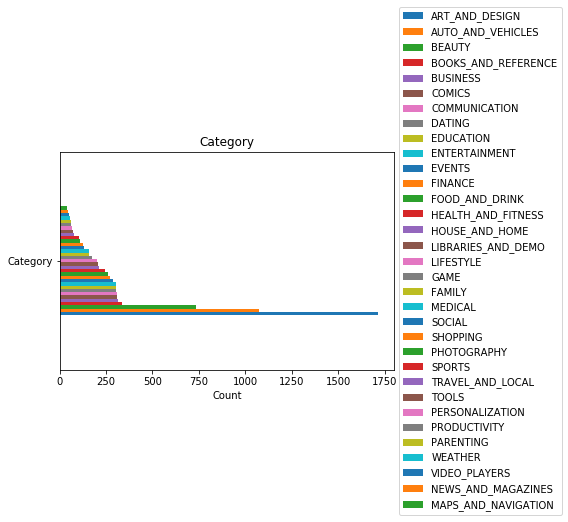

In [93]:
plotHBarGraph(column_name)

Now I convert the categorical data to numbers.

#### Column 3 - Rating

In [94]:
column_name = 'Rating'
p_stats(column_name)

Description for Column: Rating
count   8,886
mean        4
std         1
min         1
25%         4
50%         4
75%         4
max         5
Name: Rating, dtype: float64
Unique Values for Column: Rating
array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])


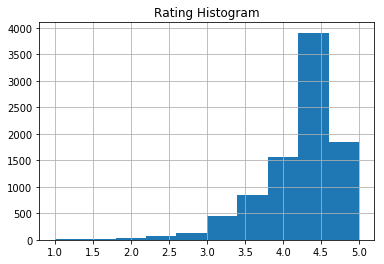

In [95]:
apps_df[column_name].hist()
plt.title('Rating Histogram')
plt.show()

#### Column 4 - Reviews
number of app store reviews

In [169]:
column_name = 'Reviews'
series = apps_df[column_name]

In [97]:
p_stats(column_name)

Description for Column: Reviews
count     8886
unique    5990
top          2
freq        82
Name: Reviews, dtype: object
Unique Values for Column: Reviews
array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)


In [170]:
pp.pprint(apps_df[column_name].unique())

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)


In [98]:
#series.hist(bins = 10)

#### Column 5 - Size
size of app

In [202]:
column_name = 'Size'

In [203]:
apps_df[column_name].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [204]:
apps_df[column_name].value_counts()

Varies with device    1468
14M                    153
13M                    152
12M                    151
11M                    149
15M                    149
17M                    126
25M                    125
21M                    112
16M                    112
24M                    111
19M                    110
20M                    107
26M                    106
18M                     99
23M                     99
10M                     93
22M                     92
27M                     85
28M                     74
37M                     71
33M                     70
30M                     69
35M                     66
31M                     65
29M                     63
3.3M                    62
44M                     56
40M                     55
46M                     54
                      ... 
404k                     1
540k                     1
899k                     1
400k                     1
306k                     1
283k                     1
2

In [209]:
normalize_varies = lambda x : '0k' if x == "Varies with device" else x

In [213]:
normalize_sizes = lambda x : float(x[:-1]) if x != 0 and x[-1:]=='k' else float(x[:-1])*float(1000)

In [214]:
normalized_size = apps_df[column_name].apply(normalize_varies)
normalized_size = normalized_size.apply(normalize_sizes)

In [217]:
normalized_size

0       19,000
1       14,000
2        8,700
3       25,000
4        2,800
5        5,600
6       19,000
7       29,000
8       33,000
9        3,100
10      28,000
11      12,000
12      20,000
13      21,000
14      37,000
16       5,500
17      17,000
18      39,000
19      31,000
20      14,000
21      12,000
22       4,200
24      23,000
25       6,000
26      25,000
27       6,100
28       4,600
29       4,200
30       9,200
31       5,200
         ...  
10795    4,000
10796    7,800
10797   46,000
10799    6,800
10800   12,000
10801   19,000
10802   28,000
10803   81,000
10804   17,000
10805   15,000
10809   24,000
10810   21,000
10812   13,000
10814   31,000
10815    4,900
10817    8,000
10819    3,600
10820    8,600
10826        0
10827   13,000
10828   13,000
10829    7,400
10830    2,300
10832      582
10833      619
10834    2,600
10836   53,000
10837    3,600
10839        0
10840   19,000
Name: Size, Length: 8886, dtype: float64

Here, we see that many of the values Vary with device. To capture what I believe to be an ordinal relationship, I will disregard the values that have sizes that vary with device and instead plot the data relatively. I will have to transform the M values to on scale with the k values.

#### Column 6 - Installs
number of app downloads

In [102]:
column_name = 'Installs'

In [103]:
apps_df[column_name].value_counts()

1,000,000+        1485
10,000,000+       1132
100,000+          1110
10,000+            988
1,000+             697
5,000,000+         683
500,000+           515
50,000+            461
5,000+             425
100,000,000+       369
100+               303
50,000,000+        272
500+               199
10+                 69
500,000,000+        61
50+                 56
1,000,000,000+      49
5+                   9
1+                   3
Name: Installs, dtype: int64

In [104]:
normalized_installs = apps_df[column_name]

In [105]:
x = lambda x : int(x[:-1].replace(',',''))

In [134]:
normalized_installs = normalized_installs.apply(x)

In [135]:
pp.pprint(normalized_installs)

0           10000
1          500000
2         5000000
3        50000000
4          100000
5           50000
6           50000
7         1000000
8         1000000
9           10000
10        1000000
11        1000000
12       10000000
13         100000
14         100000
16         500000
17          10000
18        5000000
19       10000000
20         100000
21         100000
22         500000
24          50000
25          10000
26         500000
27         100000
28          10000
29         100000
30         100000
31          50000
           ...   
10795      100000
10796     1000000
10797     1000000
10799      100000
10800        5000
10801        1000
10802       10000
10803     1000000
10804      100000
10805         100
10809     1000000
10810         100
10812        1000
10814       50000
10815      500000
10817      100000
10819        5000
10820        1000
10826     5000000
10827        5000
10828       10000
10829       10000
10830      100000
10832      100000
10833     

#### Column 7 - Type
Paid or Free Apps

In [107]:
column_name = 'Type'
apps_df[column_name].value_counts()

Free    8275
Paid     611
Name: Type, dtype: int64

In [108]:
normalizer = lambda x : int(0) if x == 'Free' else int(1)

In [109]:
normalized_type = apps_df[column_name].apply(normalizer)
normalized_type.value_counts()

0    8275
1     611
Name: Type, dtype: int64

Converted Paid to 1, and Free to 0.

#### Column 8 - Price
Cost of application

In [110]:
column_name = 'Price'
p_stats(column_name)

Description for Column: Price
count     8886
unique      73
top          0
freq      8275
Name: Price, dtype: object
Unique Values for Column: Price
array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)


In [111]:
apps_df[column_name].value_counts()

0          8275
$2.99       110
$0.99       104
$4.99        68
$1.99        59
$3.99        55
$1.49        30
$2.49        20
$5.99        15
$9.99        14
$6.99        12
$399.99      11
$4.49         9
$14.99        8
$7.99         7
$3.49         7
$12.99        4
$8.99         4
$19.99        4
$29.99        4
$11.99        3
$24.99        3
$16.99        2
$10.00        2
$17.99        2
$1.70         2
$1.00         2
$7.49         2
$10.99        2
$3.95         2
           ... 
$1.97         1
$1.75         1
$6.49         1
$389.99       1
$2.90         1
$3.02         1
$4.77         1
$4.60         1
$3.88         1
$37.99        1
$9.00         1
$1.76         1
$1.20         1
$299.99       1
$1.29         1
$15.46        1
$19.40        1
$79.99        1
$4.59         1
$4.29         1
$8.49         1
$1.61         1
$3.90         1
$3.28         1
$400.00       1
$13.99        1
$18.99        1
$1.59         1
$33.99        1
$1.50         1
Name: Price, Length: 73,

In [114]:
normalizer = lambda x : float(0.0) if x == '0' else float(x[1:])

In [115]:
formatted_price = apps_df[column_name].apply(normalizer).astype('float64')
pp.pprint(formatted_price[formatted_price == 7.49])

2168   7
2284   7
Name: Price, dtype: float64


In [125]:
type(formatted_price.values)

numpy.ndarray

and now i normalize the data

In [139]:
normalized_price = formatted_price
normalized_price = pd.Series(data = preprocessing.minmax_scale(formatted_price), index = formatted_price.index)

In [120]:
pp.pprint(normalized_price[normalized_price != 0])

array([0.012475, 0.012475, 0.009975, 0.009975, 0.017475, 0.019975,
       0.009975, 0.009975, 0.014975, 0.009975, 0.009975, 0.012475,
       0.007475, 0.008725, 0.012475, 0.007475, 0.009975, 0.007475,
       0.007475, 0.004975, 0.012475, 0.012475, 0.012475, 0.014975,
       0.017475, 0.024975, 0.012475, 0.009975, 0.007475, 0.009975,
       0.007475, 0.009975, 0.009975, 0.012475, 0.009975, 0.007475,
       0.018725, 0.007475, 0.002475, 0.002475, 0.002475, 0.012475,
       0.007475, 0.012475, 0.007475, 0.012475, 0.012475, 0.007475,
       0.007475, 0.009975, 0.009975, 0.017475, 0.007475, 0.0225  ,
       0.002475, 0.013725, 0.024975, 0.017475, 0.025   , 0.009975,
       0.014975, 0.062475, 0.029975, 0.199975, 0.029975, 0.007475,
       0.042475, 0.009975, 0.007475, 0.024975, 0.009975, 0.037475,
       0.007475, 0.009975, 0.007475, 0.074975, 0.007475, 0.007475,
       0.032475, 0.012475, 0.007475, 0.037475, 0.014975, 0.008725,
       0.002475, 0.006225, 0.062475, 0.027475, 0.004975, 0.012

In [129]:
type(normalized_price)

pandas.core.series.Series

#### Column 9 - Content Rating
Application Maturity Rating

In [38]:
column_name = 'Content Rating'
p_stats(column_name)

Description for Column: Content Rating
count         8886
unique           6
top       Everyone
freq          7089
Name: Content Rating, dtype: object
Unique Values for Column: Content Rating
array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)


In [39]:
apps_df[column_name].value_counts()

Everyone           7089
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [40]:
ratings_map = {
    'Everyone':1,
    'Everyone 10+':2,
    'Teen':3,
    'Mature 17+':4,
    'Adults only 18+':5,
    'Unrated':6
}

In [41]:
normalizer = lambda x: ratings_map[x]

In [42]:
normalized_content_rating = apps_df[column_name].copy().apply(normalizer).astype('int')

In [43]:
normalized_content_rating.value_counts()

1    7089
3    1022
4     411
2     360
5       3
6       1
Name: Content Rating, dtype: int64

In [72]:
type(normalized_content_rating)

pandas.core.series.Series

#### Column 10 - Genres
Application Genre (can have multiple)

In [44]:
apps_df['Genres']

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
5                     Art & Design
6                     Art & Design
7                     Art & Design
8                     Art & Design
9          Art & Design;Creativity
10                    Art & Design
11                    Art & Design
12                    Art & Design
13                    Art & Design
14                    Art & Design
16                    Art & Design
17                    Art & Design
18                    Art & Design
19                    Art & Design
20                    Art & Design
21                    Art & Design
22                    Art & Design
24                    Art & Design
25                    Art & Design
26         Art & Design;Creativity
27                    Art & Design
28                    Art & Design
29                    Art & Design
30                  

In [45]:
p_stats('Genres')

Description for Column: Genres
count      8886
unique      115
top       Tools
freq        732
Name: Genres, dtype: object
Unique Values for Column: Genres
array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Raci

This is good candidate for PCA with Category.

In [46]:
apps_df['Genres'].value_counts()

Tools                                  732
Entertainment                          498
Education                              446
Action                                 349
Productivity                           334
Finance                                317
Personalization                        308
Communication                          307
Lifestyle                              304
Photography                            304
Medical                                302
Sports                                 299
Business                               270
Health & Fitness                       262
Social                                 244
News & Magazines                       214
Arcade                                 205
Travel & Local                         204
Shopping                               202
Simulation                             193
Casual                                 183
Books & Reference                      177
Dating                                 159
Video Playe

#### Column 11 - Last Updated
When the application was last updated

In [47]:
column_name = 'Last Updated'
p_stats(column_name)

Description for Column: Last Updated
count               8886
unique              1299
top       August 3, 2018
freq                 291
Name: Last Updated, dtype: object
Unique Values for Column: Last Updated
array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)


In [48]:
test = apps_df[column_name].astype('datetime64[ns]')

In [49]:
min_val = test.min()

In [50]:
max_val = test.max()

In [173]:
print('first time', min_val)
print('last time', max_val)

first time 2010-05-21 00:00:00
last time 2018-08-08 00:00:00


In [51]:
year_range = test.max().year - test.min().year

In [154]:
normalizer = lambda x : (x.year - min_val.year) * 12 + x.month
normalized_last_updated = test.apply(normalizer)

In [155]:
type(normalized_last_updated)

pandas.core.series.Series

#### Column 12 - Current Version
Current Version of app available on play store.

In [65]:
column_name = 'Current Ver'

In [66]:
p_stats(column_name)

Description for Column: Current Ver
count                   8886
unique                  2638
top       Varies with device
freq                    1258
Name: Current Ver, dtype: object
Unique Values for Column: Current Ver
array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)


This is an arbitrary value set by application developers. A possible correlation occurs because of a psychological effect of higher version numbers, but this hypothesis will not be  validated this study.

#### Column 13 - Android Version
Minimum Required Version to run the App.

In [54]:
column_name = 'Android Ver'

In [55]:
p_stats(column_name)

Description for Column: Android Ver
count           8886
unique            31
top       4.1 and up
freq            1987
Name: Android Ver, dtype: object
Unique Values for Column: Android Ver
array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)


In [58]:
normalizer = lambda x : x.split(' ')[0]
lazy_cleanup = lambda x : 4.4 if x == '4.4W' else x

In [59]:
normalized_android_ver = apps_df[column_name].apply(normalizer).apply(lazy_cleanup)
pp.pprint(normalized_android_ver)

0         4.0.3
1         4.0.3
2         4.0.3
3           4.2
4           4.4
5           2.3
6         4.0.3
7           4.2
8           3.0
9         4.0.3
10          4.1
11          4.0
12          4.1
13          4.4
14          2.3
16          4.1
17          2.3
18        4.0.3
19          4.1
20          4.1
21        4.0.3
22        4.0.3
24          4.1
25          3.0
26        4.0.3
27        4.0.3
28          2.3
29          2.3
30        4.0.3
31          2.3
          ...  
10795       4.1
10796       4.1
10797       5.0
10799     4.0.3
10800       4.4
10801       4.4
10802       3.0
10803       4.0
10804       2.3
10805       4.2
10809       4.1
10810       4.4
10812     4.0.3
10814       3.0
10815       4.2
10817       5.0
10819       4.1
10820       4.1
10826    Varies
10827     4.0.3
10828       4.0
10829       4.1
10830       1.6
10832       2.1
10833       2.2
10834       4.1
10836       4.1
10837       4.1
10839    Varies
10840    Varies
Name: Android Ver, Lengt

In [63]:
normalized_android_ver.unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '4.3',
       '2.0', '3.2', 4.4, '5.1', '7.1', '8.0', '3.1', '2.0.1', '1.0'],
      dtype=object)

In [140]:
strip_latter_periods = lambda x : x if len(x) == 3 else x[0:2] + x[2:].replace('.','')

In [145]:
normalized_android_ver = normalized_android_ver.astype('str').apply(strip_latter_periods)

In [147]:
type(normalized_android_ver)

pandas.core.series.Series

In [146]:
normalized_android_ver

0          4.03
1          4.03
2          4.03
3           4.2
4           4.4
5           2.3
6          4.03
7           4.2
8           3.0
9          4.03
10          4.1
11          4.0
12          4.1
13          4.4
14          2.3
16          4.1
17          2.3
18         4.03
19          4.1
20          4.1
21         4.03
22         4.03
24          4.1
25          3.0
26         4.03
27         4.03
28          2.3
29          2.3
30         4.03
31          2.3
          ...  
10795       4.1
10796       4.1
10797       5.0
10799      4.03
10800       4.4
10801       4.4
10802       3.0
10803       4.0
10804       2.3
10805       4.2
10809       4.1
10810       4.4
10812      4.03
10814       3.0
10815       4.2
10817       5.0
10819       4.1
10820       4.1
10826    Varies
10827      4.03
10828       4.0
10829       4.1
10830       1.6
10832       2.1
10833       2.2
10834       4.1
10836       4.1
10837       4.1
10839    Varies
10840    Varies
Name: Android Ver, Lengt

Here I have taken the android versions of my applications and chopped the first number.

#### creation of normalized dataset

In [165]:
apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

got rid of genres, current version

In [226]:
norm_apps_df = pd.concat([apps_df['App'],apps_df['Rating'],apps_df['Category'], apps_df['Reviews'], normalized_android_ver, normalized_content_rating, normalized_installs, normalized_last_updated.astype('int'), normalized_price, normalized_type, normalized_size], axis = 1)

In [227]:
norm_apps_df.rename(columns={0:"Price"})

,App,Rating,Category,Reviews,Android Ver,Content Rating,Installs,Last Updated,Price,Type,Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,4,ART_AND_DESIGN,159,4.03,1,10000,97,0,0,"19,000"
1,Coloring book moana,4,ART_AND_DESIGN,967,4.03,1,500000,97,0,0,"14,000"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5,ART_AND_DESIGN,87510,4.03,1,5000000,104,0,0,"8,700"
3,Sketch - Draw & Paint,4,ART_AND_DESIGN,215644,4.2,3,50000000,102,0,0,"25,000"
4,Pixel Draw - Number Art Coloring Book,4,ART_AND_DESIGN,967,4.4,1,100000,102,0,0,"2,800"
5,Paper flowers instructions,4,ART_AND_DESIGN,167,2.3,1,50000,87,0,0,"5,600"
6,Smoke Effect Photo Maker - Smoke Editor,4,ART_AND_DESIGN,178,4.03,1,50000,100,0,0,"19,000"
7,Infinite Painter,4,ART_AND_DESIGN,36815,4.2,1,1000000,102,0,0,"29,000"
8,Garden Coloring Book,4,ART_AND_DESIGN,13791,3.0,1,1000000,93,0,0,"33,000"
9,Kids Paint Free - Drawing Fun,5,ART_AND_DESIGN,121,4.03,1,10000,103,0,0,"3,100"


In [221]:
norm_apps_df.head()

,App,Rating,Category,Reviews,Android Ver,Content Rating,Installs,Last Updated,0,Type,Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,4,ART_AND_DESIGN,159,4.03,1,10000,97,0,0,"19,000"
1,Coloring book moana,4,ART_AND_DESIGN,967,4.03,1,500000,97,0,0,"14,000"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5,ART_AND_DESIGN,87510,4.03,1,5000000,104,0,0,"8,700"
3,Sketch - Draw & Paint,4,ART_AND_DESIGN,215644,4.2,3,50000000,102,0,0,"25,000"
4,Pixel Draw - Number Art Coloring Book,4,ART_AND_DESIGN,967,4.4,1,100000,102,0,0,"2,800"


In [223]:
norm_apps_df.dtypes

App                object
Rating            float64
Category           object
Reviews            object
Android Ver        object
Content Rating      int64
Installs            int64
Last Updated        int64
0                 float64
Type                int64
Size              float64
dtype: object

### Data analysis and visualization 
quantitative (statistical) and visual analysis of your
data. You should apply quantitative measures of centrality, distribution, and correlation.
In addition, you should provide visual analysis through plots that are appropriate for a
better understanding of your data and how the data can be used to answer your question.
Extra credit for novel insightful visualizations. Using the appropriate clustering algorithm
for different measures can be very helpful for better understanding the relationships in
your data. 

### Data modeling and prediction 
development of a predictive model, regression or
classification. Your model development should include experimentation with feature
selection and hyperparameters. The effect of different features on your target variable, as
well as associations between features should be identified. You should appropriately use
train, validation, and test data when evaluating your models.

### Results analysis 
Summary of your interpretation of the results. Are the results
statistically significant? I.e., did you prove or disprove your hypothesis. How could you
improve your analysis? Lessons learned, and feedback on the assignment.

#### Notes...

NoteWorth Investigations

principle component analysis 

dimn redux 
